In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = './data/f1_data_processed.csv'

## Playground

In [35]:
data_df.head(10)

,Unnamed: 0,DriverId,TeamId,Position_Race,ClassifiedPosition,GridPosition,Time,Status,RaceDate,Position_Qual,...,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Year,RaceName,TotalLength,Finished
0,0,vettel,ferrari,1,1,3,5373.283,Finished,3/25/2018 5:10,3.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
1,1,hamilton,mercedes,2,2,1,5378.319,Finished,3/25/2018 5:10,1.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
2,2,raikkonen,ferrari,3,3,2,5379.592,Finished,3/25/2018 5:10,2.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
3,3,ricciardo,red_bull,4,4,8,5380.352,Finished,3/25/2018 5:10,5.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
4,4,alonso,mclaren,5,5,10,5401.169,Finished,3/25/2018 5:10,11.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
5,5,max_verstappen,red_bull,6,6,4,5402.228,Finished,3/25/2018 5:10,4.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
6,6,hulkenberg,renault,7,7,7,5405.954,Finished,3/25/2018 5:10,8.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
7,7,bottas,mercedes,8,8,15,5407.622,Finished,3/25/2018 5:10,10.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
8,8,vandoorne,mclaren,9,9,11,5408.204,Finished,3/25/2018 5:10,12.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1
9,9,sainz,renault,10,10,9,5419.005,Finished,3/25/2018 5:10,9.0,...,30.915315,997.003604,0.045045,36.324324,294.126126,3.691892,2018,Australian Grand Prix,306124,1


In [36]:
data_df.columns

Index(['Unnamed: 0', 'DriverId', 'TeamId', 'Position_Race',
       'ClassifiedPosition', 'GridPosition', 'Time', 'Status', 'RaceDate',
       'Position_Qual', 'Q1_Qual', 'Q2_Qual', 'Q3_Qual', 'AirTemp', 'Humidity',
       'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed',
       'Year', 'RaceName', 'TotalLength', 'Finished'],
      dtype='object')

np.float64(0.8433823529411765)

In [46]:
data_df[data_df['Status'] == 'Disqualified'][['ClassifiedPosition', 'Position_Race']]

,ClassifiedPosition,Position_Race
279,D,20
358,D,19
359,D,20
758,D,19
759,D,20


In [37]:
data_df['Status'].unique()

array(['Finished', '+1 Lap', 'Wheel', 'Engine', 'Steering', 'Brakes',
       'Puncture', 'Electrical', 'Collision damage', 'Accident',
       'Collision', '+2 Laps', '+3 Laps', 'Gearbox', 'Oil leak', 'Turbo',
       'Exhaust', 'Fuel pressure', 'Hydraulics', 'Tyre', 'Power Unit',
       'Retired', 'Power loss', 'Suspension', 'Disqualified',
       'Mechanical', 'Battery', 'Overheating', 'Damage', 'Out of fuel',
       'Transmission', 'Spun off', 'Water pressure', 'Withdrew',
       'Electronics', '+5 Laps', 'Debris', 'Radiator', 'Illness',
       'Rear wing', 'Wheel nut', 'Driveshaft'], dtype=object)

In [ ]:
data['']

### Benchmark Model

In [15]:
# Load the data and keep the necessary columns
data_df = pd.read_csv(file_path)
df = data_df[['DriverId', 'Year', 'Position_Race']]

In [16]:
# Calculate the driver's average finishing position for each year
# Group by DriverId and Year to calculate the mean Position_Race
average_positions = df.groupby(['DriverId', 'Year'])['Position_Race'].mean().reset_index()
average_positions.rename(columns={'Position_Race': 'Average_Position'}, inplace=True)

In [17]:
average_positions

,DriverId,Year,Average_Position
0,aitken,2020,16.000000
1,albon,2019,9.333333
2,albon,2020,8.789474
3,alonso,2018,12.666667
4,alonso,2021,13.000000
...,...,...,...
78,vandoorne,2018,12.857143
79,vettel,2018,3.857143
80,vettel,2019,6.428571
81,vettel,2020,11.368421


In [18]:
# Merge the average positions back to the original dataframe
df = pd.merge(df, average_positions, on=['DriverId', 'Year'], how='left')

In [19]:
# Use the average position as the predicted position
df['Predicted_Position'] = df['Average_Position']
df.head(5)

,DriverId,Year,Position_Race,Average_Position,Predicted_Position
0,vettel,2018,1,3.857143,3.857143
1,hamilton,2018,2,2.619048,2.619048
2,raikkonen,2018,3,6.000000,6.000000
3,ricciardo,2018,4,9.190476,9.190476
4,alonso,2018,5,12.666667,12.666667


In [20]:
# Calculate the RMSE of the "braindead" model
rmse = np.sqrt(mean_squared_error(df['Position_Race'], df['Predicted_Position']))
print("RMSE of the Braindead Model:", rmse)

RMSE of the Braindead Model: 4.341741347852438


## Podium Finish

### Benchmark

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [94]:
# Load the data and keep the necessary columns
data_df = pd.read_csv(file_path)
kept_df = data_df[['DriverId', 'Year', 'GridPosition', 'TeamId', 'Position_Race']]
kept_df['Podium_Finish'] = (kept_df['Position_Race'] <= 3).astype(int)
df = kept_df.copy()

In [95]:
df.head(10)

,DriverId,Year,GridPosition,TeamId,Position_Race,Podium_Finish
0,vettel,2018,3,ferrari,1,1
1,hamilton,2018,1,mercedes,2,1
2,raikkonen,2018,2,ferrari,3,1
3,ricciardo,2018,8,red_bull,4,0
4,alonso,2018,10,mclaren,5,0
5,max_verstappen,2018,4,red_bull,6,0
6,hulkenberg,2018,7,renault,7,0
7,bottas,2018,15,mercedes,8,0
8,vandoorne,2018,11,mclaren,9,0
9,sainz,2018,9,renault,10,0


In [96]:
p_podium = df.groupby(['DriverId', 'Year'])['Podium_Finish'].mean().reset_index()
p_podium.rename(columns={'Podium_Finish': 'P_Podium'}, inplace=True)
df = pd.merge(df, p_podium, on=['DriverId', 'Year'], how='left')
df.head(10)

,DriverId,Year,GridPosition,TeamId,Position_Race,Podium_Finish,P_Podium
0,vettel,2018,3,ferrari,1,1,0.571429
1,hamilton,2018,1,mercedes,2,1,0.809524
2,raikkonen,2018,2,ferrari,3,1,0.571429
3,ricciardo,2018,8,red_bull,4,0,0.095238
4,alonso,2018,10,mclaren,5,0,0.000000
5,max_verstappen,2018,4,red_bull,6,0,0.523810
6,hulkenberg,2018,7,renault,7,0,0.000000
7,bottas,2018,15,mercedes,8,0,0.380952
8,vandoorne,2018,11,mclaren,9,0,0.000000
9,sainz,2018,9,renault,10,0,0.000000


In [97]:
df.sort_values(by='P_Podium', ascending=False)[['DriverId', 'Year', 'P_Podium']].drop_duplicates().head(5)

,DriverId,Year,P_Podium
1281,max_verstappen,2021,0.857143
520,hamilton,2019,0.809524
400,hamilton,2018,0.809524
1026,hamilton,2020,0.777778
1354,hamilton,2021,0.714286


In [98]:
# Use the average position as the predicted position
df['Predicted_Podium'] = (df['P_Podium'] >= 0.5).astype(int)
df.head(5)

,DriverId,Year,GridPosition,TeamId,Position_Race,Podium_Finish,P_Podium,Predicted_Podium
0,vettel,2018,3,ferrari,1,1,0.571429,1
1,hamilton,2018,1,mercedes,2,1,0.809524,1
2,raikkonen,2018,2,ferrari,3,1,0.571429,1
3,ricciardo,2018,8,red_bull,4,0,0.095238,0
4,alonso,2018,10,mclaren,5,0,0.000000,0


In [99]:
accuracy = accuracy_score(df['Podium_Finish'], df['Predicted_Podium'])
precision = precision_score(df['Podium_Finish'], df['Predicted_Podium'])
recall = recall_score(df['Podium_Finish'], df['Predicted_Podium'])
f1 = f1_score(df['Podium_Finish'], df['Predicted_Podium'])
log_loss_value = log_loss(df['Podium_Finish'], df['P_Podium'])

print(f"Braindead Model Metrics:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nLog Loss: {log_loss_value}")

Braindead Model Metrics:
Accuracy: 0.9014705882352941
Precision: 0.6785714285714286
Recall: 0.6519607843137255
F1 Score: 0.665
Log Loss: 0.20454884702719373


### Regression with GridPosition and TeamId

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
kept_df

,DriverId,Year,GridPosition,TeamId,Position_Race,Podium_Finish
0,vettel,2018,3,ferrari,1,1
1,hamilton,2018,1,mercedes,2,1
2,raikkonen,2018,2,ferrari,3,1
3,ricciardo,2018,8,red_bull,4,0
4,alonso,2018,10,mclaren,5,0
...,...,...,...,...,...,...
1355,latifi,2021,16,williams,16,0
1356,russell,2021,15,williams,17,0
1357,max_verstappen,2021,3,red_bull,18,0
1358,stroll,2021,19,aston_martin,19,0


In [106]:
df = kept_df.copy()
df = pd.get_dummies(df, columns=['TeamId', 'DriverId', 'Year'], drop_first=True)
# Define features and target
X = df.drop(columns=['Position_Race', 'Podium_Finish'])
y = df['Podium_Finish']

In [107]:
# Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X, y)

LogisticRegression(max_iter=1000, random_state=42)

In [108]:
# Predict and Evaluate the Model
df['Logistic_Prediction'] = log_reg.predict(X)
df['Logistic_Probability'] = log_reg.predict_proba(X)[:, 1]

In [109]:
accuracy_log = accuracy_score(df['Podium_Finish'], df['Logistic_Prediction'])
precision_log = precision_score(df['Podium_Finish'], df['Logistic_Prediction'])
recall_log = recall_score(df['Podium_Finish'], df['Logistic_Prediction'])
f1_log = f1_score(df['Podium_Finish'], df['Logistic_Prediction'])
log_loss_log = log_loss(df['Podium_Finish'], df['Logistic_Probability'])

print(f"Logistic Regression Model Metrics:\nAccuracy: {accuracy_log}\nPrecision: {precision_log}\nRecall: {recall_log}\nF1 Score: {f1_log}\nLog Loss: {log_loss_log}")

Logistic Regression Model Metrics:
Accuracy: 0.9117647058823529
Precision: 0.7038834951456311
Recall: 0.7107843137254902
F1 Score: 0.7073170731707317
Log Loss: 0.2084712629711017


In [111]:
print(classification_report(df['Podium_Finish'], df['Logistic_Prediction']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1156
           1       0.70      0.71      0.71       204

    accuracy                           0.91      1360
   macro avg       0.83      0.83      0.83      1360
weighted avg       0.91      0.91      0.91      1360



### Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
predicting_var = ['GridPosition', 'TeamId', 'DriverId', 'Year']
target_var = 'Position_Race'
df = data_df[predicting_var+[target_var]]
df.head(5)

,GridPosition,TeamId,DriverId,Year,Position_Race
0,3,ferrari,vettel,2018,1
1,1,mercedes,hamilton,2018,2
2,2,ferrari,raikkonen,2018,3
3,8,red_bull,ricciardo,2018,4
4,10,mclaren,alonso,2018,5


In [27]:
df['Position_Race'] = df['Position_Race'].astype('category')
# One-hot encode categorical variables (TeamId, DriverId, Year)
df = pd.get_dummies(df, columns=['TeamId', 'DriverId', 'Year'], drop_first=True)
# Define features and target
X = df.drop(columns=['Position_Race'])
y = df['Position_Race']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
# Train the Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [30]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.125


In [32]:
y_test_numeric = y_test.astype(int)
y_pred_numeric = y_pred.astype(int)

rmse = np.sqrt(mean_squared_error(y_test_numeric, y_pred_numeric))
print("RMSE of the Logistic Regression Model:", rmse)

RMSE of the Logistic Regression Model: 4.931516292295552


In [33]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.42      0.38      0.40        13
           2       0.15      0.23      0.18        13
           3       0.14      0.07      0.10        14
           4       0.07      0.08      0.07        13
           5       0.14      0.07      0.10        14
           6       0.17      0.23      0.19        13
           7       0.17      0.29      0.22        14
           8       0.09      0.14      0.11        14
           9       0.09      0.08      0.08        13
          10       0.11      0.14      0.12        14
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        13
          13       0.25      0.07      0.11        14
          14       0.22      0.14      0.17        14
          15       0.10      0.07      0.08        14
          16       0.05      0.15      0.07        13
          17       0.18      0.21      0.19        14
  

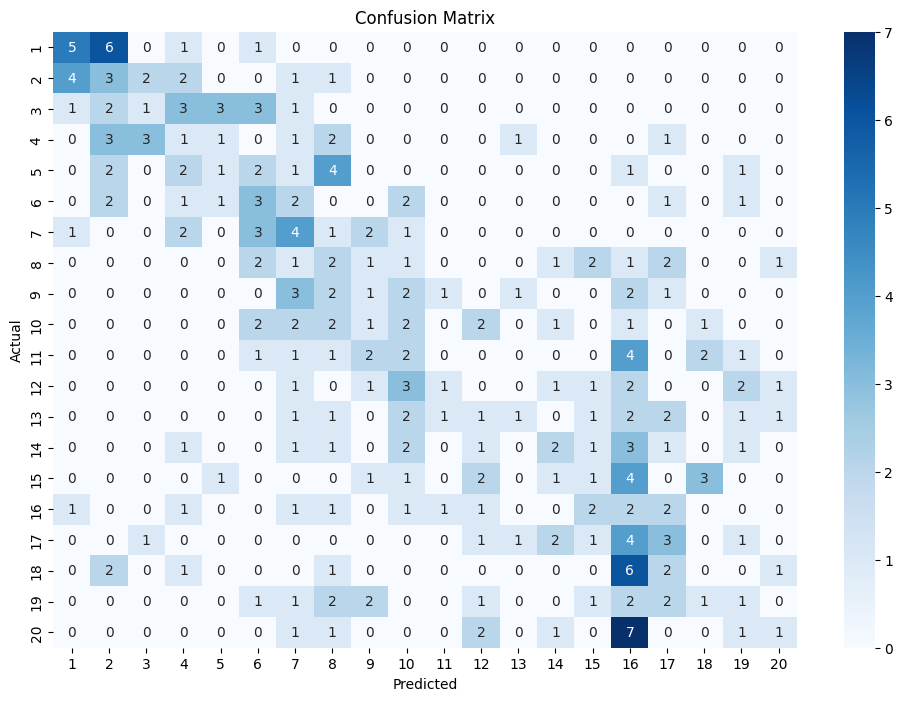

In [34]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()